# Analyzing Unemployment Using Python TASK 2

### First import the important libraries.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Store and read the data

In [117]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020[1].csv')
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [121]:
#Some feature names are incorrect
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
                'Estimated Labour Participation Rate', 'Region', 'longitude','latitude']

#check changes
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [123]:
#number of rows and columns
data.shape

(267, 9)

### Dataset information

In [125]:
data.dtypes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate,267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Does the Dataset have any missing values or not?

In [126]:
print(data.isnull().sum())

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


# Let's examine the relationship between the features within the dataset.

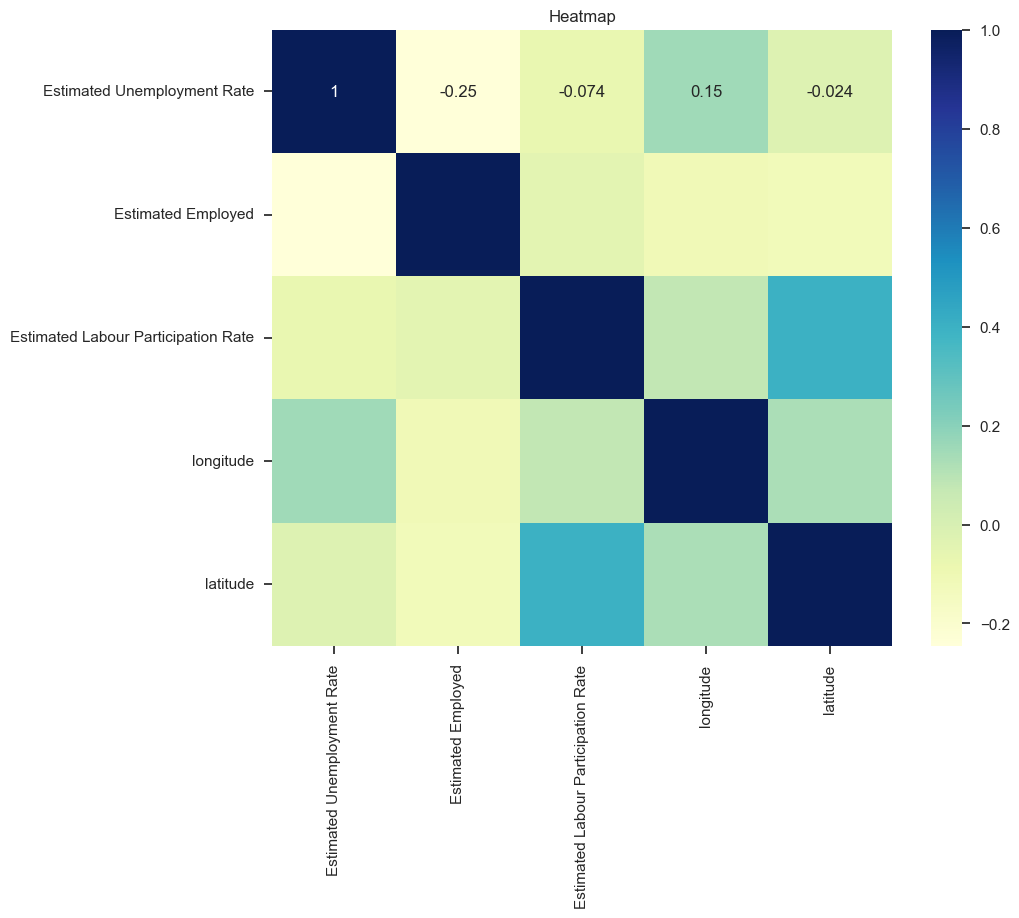

In [131]:
# Constructing heatmap with correlation values
heat_map = data[['Estimated Unemployment Rate', 'Estimated Employed',
                'Estimated Labour Participation Rate', 'longitude', 'latitude']].corr()

# Plotting the figure
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.set_context('notebook', font_scale = 1)
sns.heatmap(heat_map, annot = True, cmap = 'YlGnBu')
plt.title('Heatmap')
plt.show()

# Unemployment Rate Analysis of India: Data Visualization

### Unemployment Rate by State.

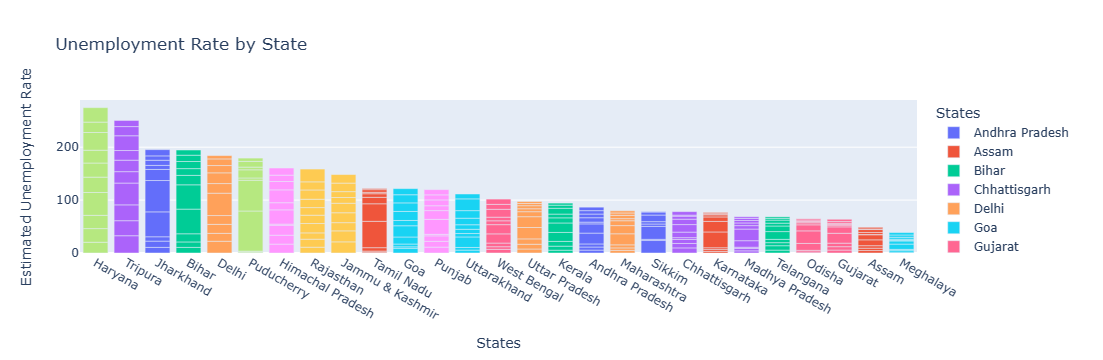

In [133]:
fig= px.bar(data, x= "States", y= "Estimated Unemployment Rate", color ="States",
               title ="Unemployment Rate by State", template = 'plotly')               
fig.update_layout(xaxis = {'categoryorder' : 'total descending'})
fig.show()

### Pairwise Relationships

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



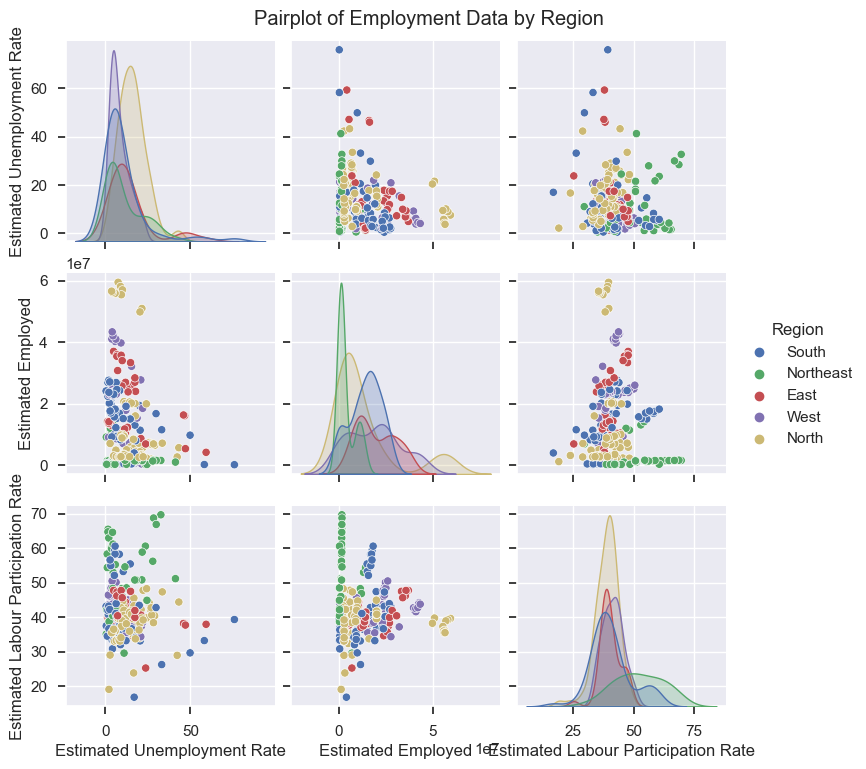

In [147]:
unique_regions = data['Region'].unique()

region_colors = {region: sns.color_palette()[i] for i, region in enumerate(unique_regions)}

pairplot = sns.pairplot(data, vars=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], hue='Region', palette=region_colors)
pairplot.fig.suptitle("Pairplot", y=1.02)

plt.show()

# Unmployment Rate and Date by Region

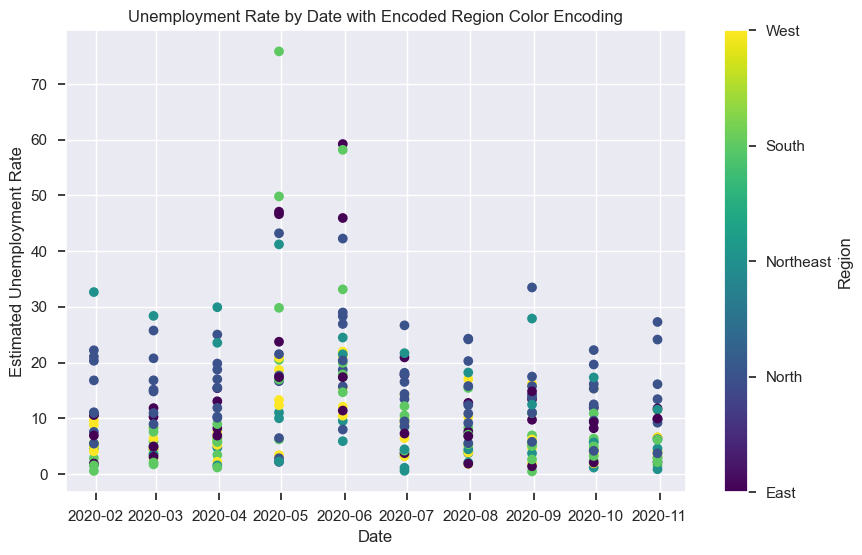

In [167]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Region' column
data['Region_encoded'] = label_encoder.fit_transform(data['Region'])

# Get the unique region names
region_names = label_encoder.classes_


plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Date'], data['Estimated Unemployment Rate'], c=data['Region_encoded'], cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Unemployment Rate by Date with Encoded Region Color Encoding')
cbar = plt.colorbar(scatter, ticks=range(len(region_names)))
cbar.set_ticklabels(region_names)
cbar.set_label('Region')

plt.show()

# Unemployment Rate and Labour Participation Rate by States

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



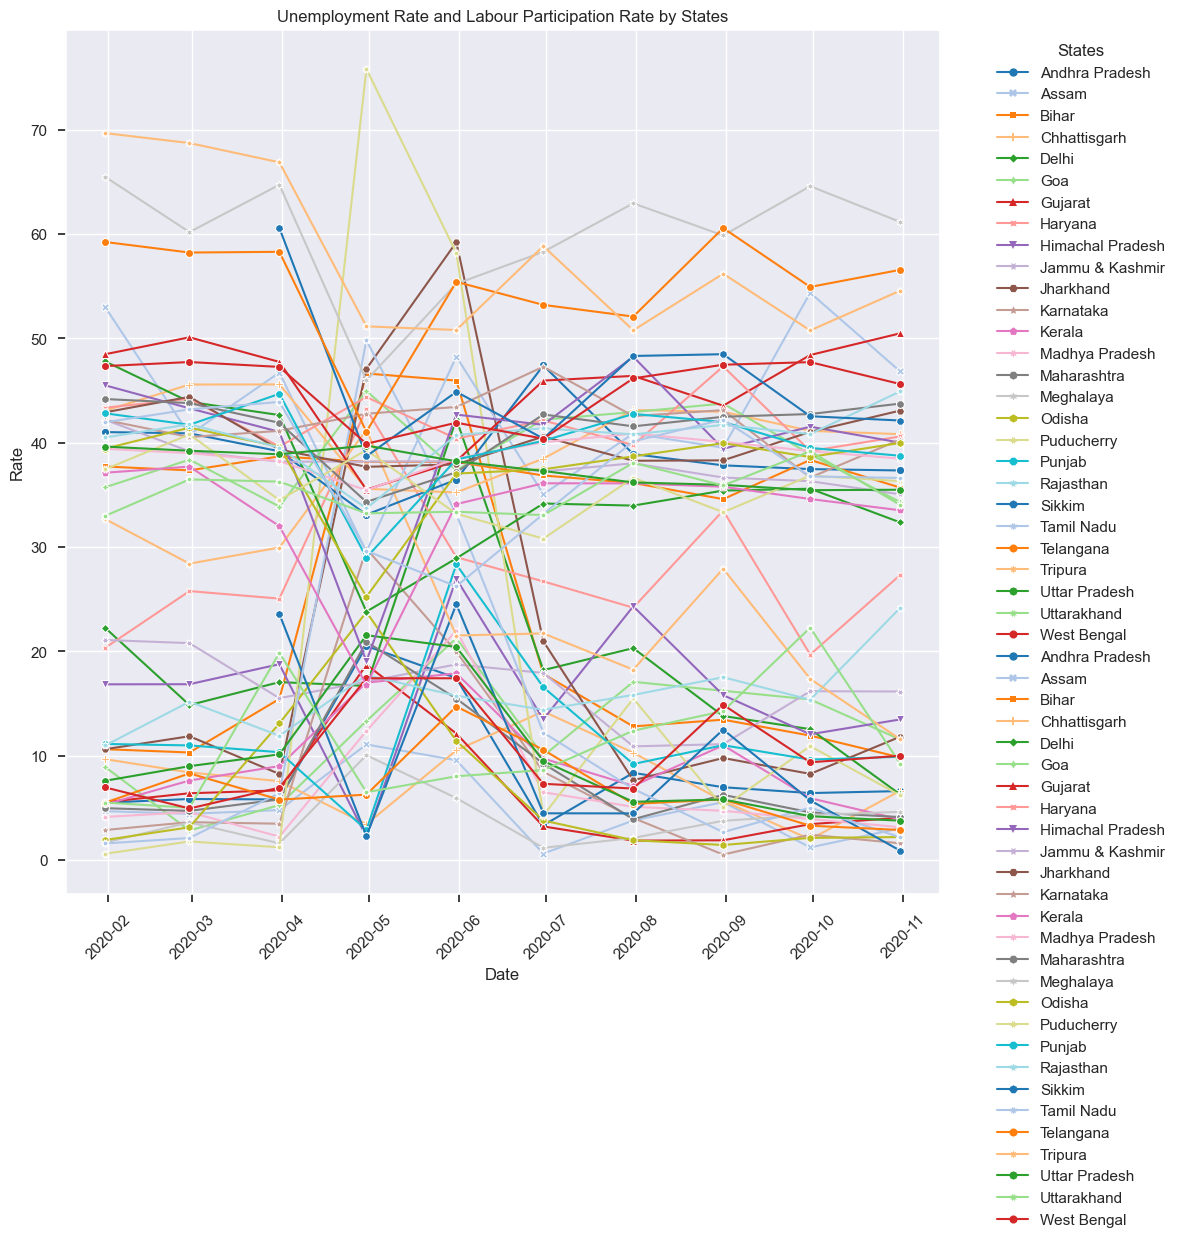

In [196]:
plt.figure(figsize=(12,12 ))
sns.lineplot(data=data, x='Date', y='Estimated Unemployment Rate', hue='States', style='States', markers=True, dashes=False, palette='tab20')
sns.lineplot(data=data, x='Date', y='Estimated Labour Participation Rate', hue='States', style='States', markers=True, dashes=False, palette='tab20')
plt.title('Unemployment Rate and Labour Participation Rate by States')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Unemployment Rate according to Labour Participation

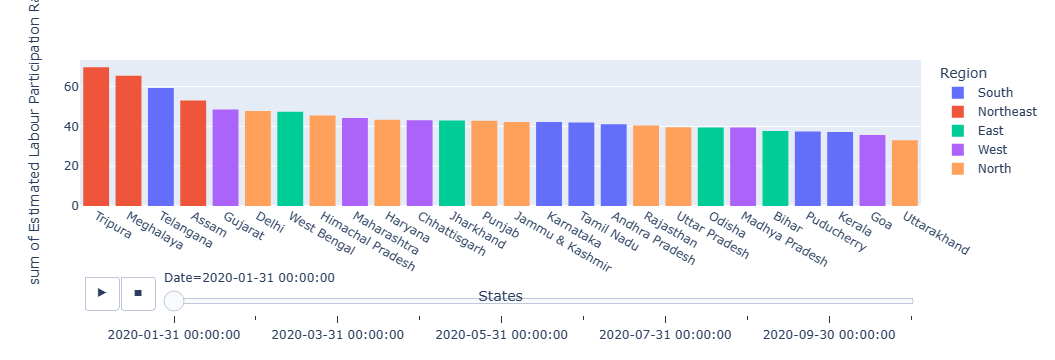

In [202]:
fig = px.histogram(data, x='States', y='Estimated Labour Participation Rate', color='Region', 
                   animation_frame='Date', template='plotly')
fig.update_layout(xaxis = {'categoryorder' : 'total descending'})

# Show the plot
fig.show()

# Final Visual Summary of Unemployment Rate

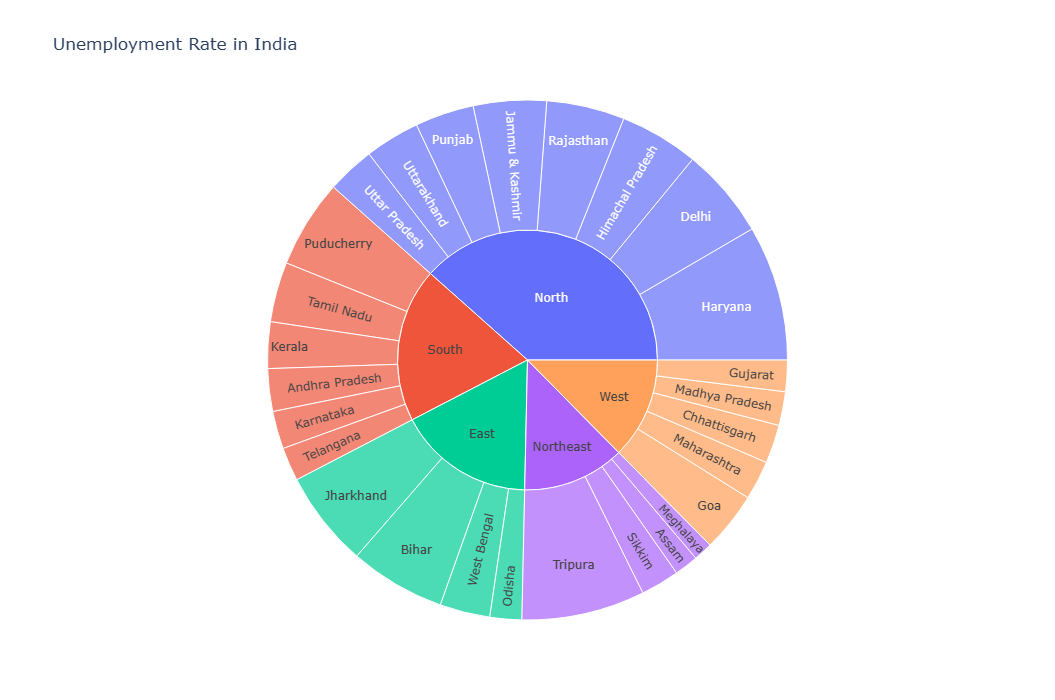

In [203]:
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()